**Table of Contents**
1. Data Cleaning
1. BestSeller Filter
1. Category Aggregation
1. Best-Seller Analysis Across Main Categories      
    4.1. Quick Look of Best-Selling Products  
    4.2. Price Distribution  
    4.3. Distribution of Star Ratings  
    4.4. Distribution of Review Counts  
    4.5. Average Discount Amount by Main Category  
    4.6. Average Rating by Main Category  
    4.7. Distribution of Ratings  
    4.8. Total Number of Reviews  
    4.9. Average Ratings per Product
1. Summary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display, HTML, Image


In [2]:
data = pd.read_csv('/kaggle/input/amazon-canada-products-2023-2-1m-products/amz_ca_total_products_data_processed.csv')

**1. Data Cleaning**

In [3]:
data.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,categoryName,isBestSeller,boughtInLastMonth
0,B07CV4L6HX,"Green Leaf WW3D Wonder Extension Cord Winder, ...",https://m.media-amazon.com/images/I/81cRe0AVC4...,https://www.amazon.ca/dp/B07CV4L6HX,4.4,2876,47.69,0.00,Industrial Scientific,False,0
1,B09N1HGY74,8pcs Toilet Seat Bumpers Universal Toilet Repl...,https://m.media-amazon.com/images/I/512CpB-EP5...,https://www.amazon.ca/dp/B09N1HGY74,3.8,55,10.99,0.00,Industrial Scientific,False,100
2,B087P7538J,YaeCCC 19 Pcs Hole Saw Kit 3/4''(19mm)- 6''(15...,https://m.media-amazon.com/images/I/71P+qLFDFc...,https://www.amazon.ca/dp/B087P7538J,4.0,126,25.99,27.99,Industrial Scientific,False,50
3,B0822FF7YQ,LLPT Butyl Putty Tape White 1 Inch x 33Ft Tigh...,https://m.media-amazon.com/images/I/61wfWLZRn-...,https://www.amazon.ca/dp/B0822FF7YQ,4.5,1936,21.99,30.99,Industrial Scientific,False,100
4,B08NTR8NN4,"Lightbeam 16"" Long Stem Deep Fry Thermometer w...",https://m.media-amazon.com/images/I/61qJG-y1He...,https://www.amazon.ca/dp/B08NTR8NN4,4.2,46,18.99,0.00,Industrial Scientific,False,100


In [4]:
missing_data = data.isnull().sum()
print(missing_data)

asin                 0
title                6
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
listPrice            0
categoryName         0
isBestSeller         0
boughtInLastMonth    0
dtype: int64


In [5]:
data= data.dropna(subset=['title'])

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2165920 entries, 0 to 2165925
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   asin               object 
 1   title              object 
 2   imgUrl             object 
 3   productURL         object 
 4   stars              float64
 5   reviews            int64  
 6   price              float64
 7   listPrice          float64
 8   categoryName       object 
 9   isBestSeller       bool   
 10  boughtInLastMonth  int64  
dtypes: bool(1), float64(3), int64(2), object(5)
memory usage: 183.8+ MB
None


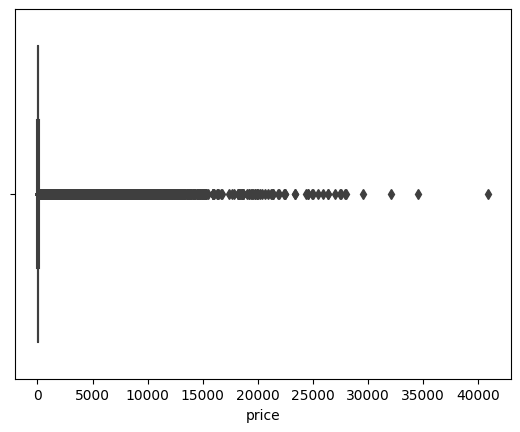

In [7]:
sns.boxplot(x=data['price'])
plt.show()


In [8]:
zero_price_count = (data['price'] == 0).sum()
negative_price_count = (data['price'] < 0).sum()
print(f"'price' column has {zero_price_count} 0 values and {negative_price_count} negative values.")


'price' column has 177910 0 values and 0 negative values.


In [9]:
data = data[data['price'] > 0]
remaining_zero_price_count = (data['price'] == 0).sum()
remaining_negative_price_count = (data['price'] < 0).sum()
print(f"After removal, 'price' column has {remaining_zero_price_count} 0 values and {remaining_negative_price_count} negative values.")

After removal, 'price' column has 0 0 values and 0 negative values.


In [10]:
data = data[(data['stars'] >= 0) & (data['stars'] <= 5)]
data = data[data['reviews'] >= 0]
data = data[data['boughtInLastMonth'] >= 0]
print(data['categoryName'].value_counts())

categoryName
Baby                            24074
Luggage  Travel Gear            22449
Handmade Home Décor             19143
Handmade Kitchen  Dining        19074
Handmade Jewellery              18545
                                ...  
Kids' Ball Pits  Accessories      587
Blu-ray Players  Recorders        467
Smart Home                        434
STEM                              210
International Food Market         152
Name: count, Length: 266, dtype: int64


In [11]:
data = data[data['listPrice'] > 0]

In [12]:
data = data.drop_duplicates()

In [13]:
data.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,categoryName,isBestSeller,boughtInLastMonth
2,B087P7538J,YaeCCC 19 Pcs Hole Saw Kit 3/4''(19mm)- 6''(15...,https://m.media-amazon.com/images/I/71P+qLFDFc...,https://www.amazon.ca/dp/B087P7538J,4.0,126,25.99,27.99,Industrial Scientific,False,50
3,B0822FF7YQ,LLPT Butyl Putty Tape White 1 Inch x 33Ft Tigh...,https://m.media-amazon.com/images/I/61wfWLZRn-...,https://www.amazon.ca/dp/B0822FF7YQ,4.5,1936,21.99,30.99,Industrial Scientific,False,100
9,B07KMT96S2,"Knife Sharpening Stone,400/1000.2000/5000 Doub...",https://m.media-amazon.com/images/I/61uWVjhezJ...,https://www.amazon.ca/dp/B07KMT96S2,4.4,366,29.99,35.99,Industrial Scientific,False,50
13,B08R8T657H,"MIXPOWER Extra Long Torx Bit Socket Set, 3.5-i...",https://m.media-amazon.com/images/I/6154LErNL3...,https://www.amazon.ca/dp/B08R8T657H,4.4,82,19.97,21.97,Industrial Scientific,False,0
18,B088M3JCP2,Heat Insulation Silicone Repair Mat with Scale...,https://m.media-amazon.com/images/I/61nzkHmJSZ...,https://www.amazon.ca/dp/B088M3JCP2,4.7,142,21.99,25.99,Industrial Scientific,False,50


**2. BestSeller Filter**

In [14]:
best_sellers = data[data['isBestSeller'] == True]

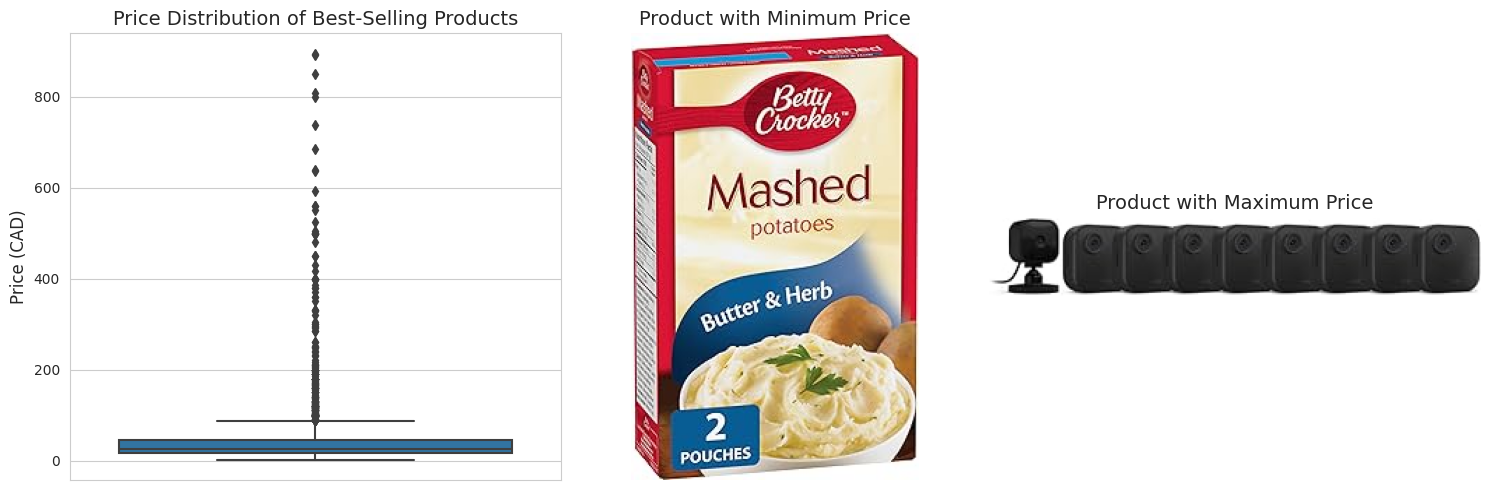

In [15]:
from PIL import Image
# Setting the style for Seaborn
sns.set_style("whitegrid")

# Finding the URLs of the products with minimum and maximum prices
min_price_url = best_sellers[best_sellers['price'] == best_sellers['price'].min()]['imgUrl'].iloc[0]
max_price_url = best_sellers[best_sellers['price'] == best_sellers['price'].max()]['imgUrl'].iloc[0]

# Retrieving the images
response_min = requests.get(min_price_url)
img_min = Image.open(BytesIO(response_min.content))

response_max = requests.get(max_price_url)
img_max = Image.open(BytesIO(response_max.content))

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15,5))

# Boxplot for prices
sns.boxplot(y=best_sellers['price'], ax=axs[0])
axs[0].set_title('Price Distribution of Best-Selling Products', fontsize=14)
axs[0].set_ylabel('Price (CAD)', fontsize=12)

# Image for product with minimum price
axs[1].imshow(img_min)
axs[1].set_title('Product with Minimum Price', fontsize=14)
axs[1].axis('off')  # Turn off the axis

# Image for product with maximum price
axs[2].imshow(img_max)
axs[2].set_title('Product with Maximum Price', fontsize=14)
axs[2].axis('off')  # Turn off the axis

# Display the plots
plt.tight_layout()
plt.show()


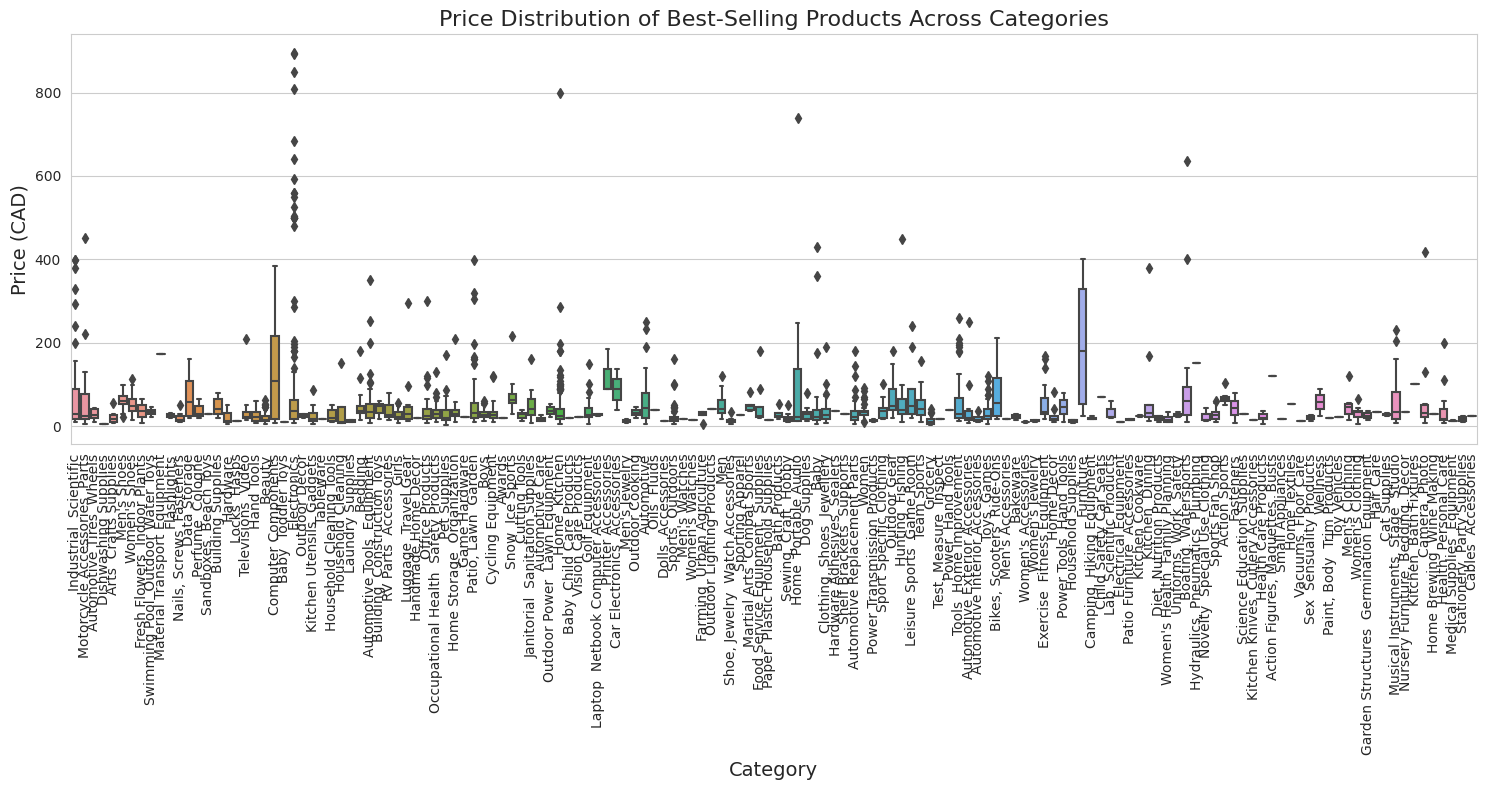

In [16]:
plt.figure(figsize=(15,8))
sns.boxplot(x=best_sellers['categoryName'], y=best_sellers['price'])
plt.xticks(rotation=90)  
plt.title('Price Distribution of Best-Selling Products Across Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Price (CAD)', fontsize=14)
plt.tight_layout()
plt.show()

**3. Category Aggregation**

In [17]:
unique_categories_count = data['categoryName'].nunique()
print(f"There are {unique_categories_count} unique categories in the dataset.")


There are 261 unique categories in the dataset.


In [18]:
unique_categories = data['categoryName'].unique()
print(f"Unique categories are:\n{unique_categories}")


Unique categories are:
['Industrial  Scientific' 'Motorcycle Accessories  Parts'
 'Automotive Tires  Wheels' 'Dishwashing Supplies' 'Arts  Crafts Supplies'
 "Men's Shoes" "Women's Shoes" 'Fresh Flowers  Indoor Plants'
 'Swimming Pool  Outdoor Water Toys' 'Material Transport Equipment'
 'Flashlights' 'Nails, Screws  Fasteners'
 'Audio/Video Receivers  Amplifiers' 'Digital Media Devices'
 'Data Storage' 'Perfume  Cologne' 'Sandboxes  Beach Toys'
 'Building Supplies' 'Ladders' 'Scaffolding Equipment' 'Hardware'
 'Door Hardware  Locks' 'Furniture Hardware' 'Gate Hardware'
 'Mailboxes  Accessories' 'Locks  Hasps' 'Televisions  Video'
 'TV Accessories' 'Satellite Television Equipment' 'Televisions'
 'Hand Tools' 'Beauty' 'Bath  Body' 'Salon  Spa Equipment'
 'Shaving  Hair Removal Products' 'Skin Care Products'
 'Tattooing Supplies' 'Beauty Tools  Accessories' 'Computer Components'
 'Baby  Toddler Toys' 'Job Site Lighting' 'Bathroom Hardware'
 'Hardware Hooks' 'Window Hardware' 'Home Theatre 

In [19]:
def categorize_into_main_groups(category):
    fashion = ["Men's Shoes", "Women's Shoes", "Men's Jewelry", "Women's Handbags", 
               "Men's Watches", "Women's Watches", "Men's Accessories", "Women's Accessories", 
               "Men's Clothing", "Women's Clothing", "Women's Jewelry", "Men's Accessories", 
               "Shoe, Jewelry & Watch Accessories", "Handmade Clothing, Shoes & Accessories", 
               "Novelty & Special Use Clothing", "Sport Specific Clothing", "Sporting Apparel", 
               "Uniforms, Work & Safety", "Clothing, Shoes & Jewellery"]

    home_kitchen = ["Kitchen Utensils & Gadgets", "Household Cleaning Tools", "Household Cleaning", 
                    "Laundry Supplies", "Bedding", "Home Décor", "Household Supplies", "Kitchen & Dining", 
                    "Household Cleaning Tools", "Household Cleaning", "Laundry Supplies", "Kitchen & Bath Fixtures",
                    "Kitchen Cookware", "Household Batteries", "Heating Cooling & Air Quality", "Large Appliances", 
                    "Small Appliances", "Vacuums & Floor Care"]

    beauty_personal_care = ["Perfume & Cologne", "Beauty", "Bath & Body", "Shaving & Hair Removal Products", 
                            "Skin Care Products", "Makeup", "Hair Care", "Beauty Tools & Accessories", 
                            "Nail Polish & Nail Decoration Products", "Oral Hygiene Products", "Bath Products", 
                            "Sex & Sensuality Products", "Vision Care Products", "Skin Care Products", 
                            "Tattooing Supplies", "Beauty Tools & Accessories", "Luxury Beauty", 
                            "Handmade Beauty & Grooming Products"]

    toys_games = ["Baby & Toddler Toys", "Building & Construction Toys", "Handmade Toys & Games", 
                  "Dolls & Accessories", "Action Figures, Maquettes & Busts", "Stuffed & Plush Animals", 
                  "Collectible Toys", "Bikes, Scooters & Ride-Ons", "Toys & Games", "Kites & Wind Spinners", 
                  "Sandboxes & Beach Toys", "Kids' Play Tents & Tunnels", "Kids' Slumber Bags", "Toy Sports Equipment", 
                  "Outdoor Play Toys", "Toy Vehicles", "Toy Foam Blasters & Guns", "Bubble Blowing Products"]
    automotive = ["Motorcycle Accessories & Parts", "Automotive Tires & Wheels", "Automotive Tools & Equipment", 
                  "RV Parts & Accessories", "Automotive Care", "Automotive Replacement Parts", 
                  "Automotive Exterior Accessories", "Automotive Interior Accessories", 
                  "Oils & Fluids", "Car Electronics & Accessories", "Paint, Body & Trim Products"]

    sports_outdoors = ["Swimming Pool & Outdoor Water Toys", "Cycling Equipment", "Snow & Ice Sports", 
                       "Outdoor Power & Lawn Equipment", "Patio, Lawn & Garden", "Outdoor Lighting Products", 
                       "Martial Arts & Combat Sports", "Camping & Hiking Equipment", "Outdoor Gear", 
                       "Hunting & Fishing", "Outdoor Recreation Apparel & Equipment", 
                       "Leisure Sports & Game Room", "Team Sports", "Boating & Watersports", "Action Sports"]

    hardware_tools = ["Material Transport Equipment", "Flashlights", "Nails, Screws & Fasteners", 
                      "Building Supplies", "Ladders", "Scaffolding Equipment", "Hardware", "Door Hardware & Locks", 
                      "Furniture Hardware", "Gate Hardware", "Mailboxes & Accessories", "Locks & Hasps", 
                      "Hand Tools", "Hardware Hooks", "Window Hardware", "Job Site Lighting", "Bathroom Hardware", 
                      "Cutting Tools", "Automotive Tools & Equipment", "Power & Hand Tools", "Handmade Tools"]

    health_wellness = ["Wellness", "Health & Personal Care", "Medical Supplies & Equipment", 
                       "Vitamins, Minerals & Supplements", "Diet & Nutrition Products", 
                       "Women's Health & Family Planning", "Health Care Products", "Baby & Child Care Products"]

    arts_crafts = ["Arts & Crafts Supplies", "Handmade Jewellery", "Sewing, Craft & Hobby", "Artwork", 
                   "3D Printing & Scanning", "Handmade Home Décor", "Handmade in Canada", 
                   "Handmade Stationery & Party Supplies"]
    electronics_tech = ["Audio/Video Receivers & Amplifiers", "Digital Media Devices", "Data Storage", 
                        "Televisions & Video", "TV Accessories", "Satellite Television Equipment", 
                        "Televisions", "Computer Components", "Electronics", "Home Theatre Systems", 
                        "Computer Monitors", "Networking Products", "Desktop Computers", 
                        "Laptop & Netbook Computer Accessories", "Printer Accessories", "Printers", 
                        "Game Hardware", "Computer Components", "Electronics & Gadgets", 
                        "Musical Instruments, Stage & Studio", "Vehicle Electronics", "Camera & Photo", 
                        "Laptop Computers", "Smart Home", "Computer Audio & Video Accessories", 
                        "USB Hubs", "Computer Cable Adapters", "Computer Security Cables", 
                        "Computer Hard Drive Accessories", "Keyboards, Mice & Input Devices", 
                        "Computer Uninterrupted Power Supply", "Memory Card Accessories", "Cables & Accessories"]

    beauty_personal_care = ["Perfume & Cologne", "Beauty", "Bath & Body", "Shaving & Hair Removal Products", 
                            "Skin Care Products", "Makeup", "Beauty Tools & Accessories", "Nail Polish & Nail Decoration Products", 
                            "Luxury Beauty", "Hair Care", "Oral Hygiene Products", "Handmade Beauty & Grooming Products", 
                            "Vision Care Products", "Sex & Sensuality Products", "Bath Products"]

    home_garden = ["Fresh Flowers & Indoor Plants", "Sandboxes & Beach Toys", "Outdoor Décor", 
                   "Pools, Hot Tubs & Supplies", "Patio Furniture & Accessories", 
                   "Home Brewing & Wine Making", "Air Freshener Supplies", "Home Storage & Organization", 
                   "Garden Structures & Germination Equipment", "Outdoor Heating & Cooling", "Plants Seeds & Bulbs", 
                   "Kitchen Storage & Organization", "Coffee, Tea & Espresso", "Kitchen Knives & Cutlery Accessories", 
                   "Barware", "Heating Cooling & Air Quality", "Large Appliances"]
    
    if category in fashion:
        return "Fashion"
    elif category in home_kitchen:
        return "Home & Kitchen"
    elif category in beauty_personal_care:
        return "Beauty & Personal Care"
    elif category in toys_games:
        return "Toys & Games"
    elif category in automotive:
        return "Automotive"
    elif category in sports_outdoors:
        return "Sports & Outdoors"
    elif category in hardware_tools:
        return "Hardware & Tools"
    elif category in health_wellness:
        return "Health & Wellness"
    elif category in arts_crafts:
        return "Arts & Crafts"
    elif category in electronics_tech:
        return "Electronics & Tech"
    elif category in beauty_personal_care:
        return "Beauty & Personal Care"
    elif category in home_garden:
        return "Home & Garden"
# Applying the function to the 'categoryName' column
best_sellers.loc[:, 'mainCategory'] = best_sellers['categoryName'].apply(categorize_into_main_groups)

/tmp/ipykernel_20/2099033122.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_sellers.loc[:, 'mainCategory'] = best_sellers['categoryName'].apply(categorize_into_main_groups)


In [20]:
product_counts_per_category = best_sellers.groupby('mainCategory').size()
print(product_counts_per_category)


mainCategory
Arts & Crafts               1
Automotive                 80
Beauty & Personal Care    102
Electronics & Tech        187
Fashion                    72
Hardware & Tools           59
Health & Wellness          19
Home & Garden               4
Home & Kitchen             54
Sports & Outdoors          99
Toys & Games                1
dtype: int64


In [21]:
best_sellers = best_sellers[~best_sellers['mainCategory'].isin(['Arts & Crafts', 'Home & Garden', 'Toys & Games'])]


**4. Best-Seller Analysis Across Main Categories**

**4.1 Quick Look of Best-Selling Products**

In [22]:
from IPython.display import display, HTML, Image
best_sellers['discount_amount'] = best_sellers['listPrice'] - best_sellers['price']

def display_images(main_category, df, label):
    for index, row in df.iterrows():
        print(f"{label} in {main_category} - {row['title']}")
        print(f"Price: {row['price']} CAD")
        print(f"Rating: {row['stars']} stars")
        print(f"Reviews: {row['reviews']} reviews")
        if row['listPrice'] > 0:
            print(f"Discount: {round((row['listPrice'] - row['price']) / row['listPrice'] * 100, 2)}%")
        display(Image(url=row['imgUrl'], width=200, unconfined=True))
        print("-"*50)

for main_category in best_sellers['mainCategory'].unique():
    print(f"Main Category: {main_category}\n")
    min_price_product = best_sellers[best_sellers['mainCategory'] == main_category].nsmallest(1, 'price')
    max_price_product = best_sellers[best_sellers['mainCategory'] == main_category].nlargest(1, 'price')
    
    # Correct the reference to 'discount_amount' here
    max_discount_product = best_sellers[best_sellers['mainCategory'] == main_category].nlargest(1, 'discount_amount')

    display_images(main_category, min_price_product, "Lowest Priced Product")
    display_images(main_category, max_price_product, "Highest Priced Product")
    display_images(main_category, max_discount_product, "Product with Highest Discount")

Main Category: None

Main Category: Fashion

Lowest Priced Product in Fashion - Womens French Terry Drop Sleeve V Neck Tee
Price: 5.67 CAD
Rating: 2.7 stars
Reviews: 6 reviews
Discount: 32.42%


--------------------------------------------------
Highest Priced Product in Fashion - Men's 3 Pieces Suit Elegant Solid One Button Slim Fit Single Breasted Party Blazer Vest Pants Set
Price: 119.99 CAD
Rating: 4.0 stars
Reviews: 7762 reviews
Discount: 20.01%


--------------------------------------------------
Product with Highest Discount in Fashion - Mens Men's X Ultra Pioneer Climasalomon™ Waterproof Hiking Shoes for Men Climbing Shoe
Price: 98.98 CAD
Rating: 4.4 stars
Reviews: 979 reviews
Discount: 46.39%


--------------------------------------------------
Main Category: Hardware & Tools

Lowest Priced Product in Hardware & Tools - Safety 1st HS2700300 OutSmart Multi-Use Lock, White
Price: 4.97 CAD
Rating: 4.6 stars
Reviews: 1791 reviews
Discount: 44.72%


--------------------------------------------------
Highest Priced Product in Hardware & Tools - MaxWorks Industrial Polypropylene Two-Tray Cart, 30"x16" (80855), Black
Price: 172.94 CAD
Rating: 4.7 stars
Reviews: 1905 reviews
Discount: 6.0%


--------------------------------------------------
Product with Highest Discount in Hardware & Tools - Knife Sharpening Stone Set – 400/1000 and 3000/8000-Grit Professional, Safe Knife Sharpener Set – Whetstone Set Includes Flattening Stone, Bamboo Base, and 2 Nonslip Rubber Bases
Price: 49.97 CAD
Rating: 4.6 stars
Reviews: 4907 reviews
Discount: 45.8%


--------------------------------------------------
Main Category: Electronics & Tech

Lowest Priced Product in Electronics & Tech - M.2 Screw Kit,NVMe Screw m.2 SSD Mounting Kit
Price: 6.99 CAD
Rating: 4.5 stars
Reviews: 7114 reviews
Discount: 41.7%


--------------------------------------------------
Highest Priced Product in Electronics & Tech - All-New Blink Outdoor 4 (4th Gen) + Blink Mini – Smart security camera, two-way talk, HD live view, motion detection, set up in minutes, Works with Alexa – 8 camera system + Mini (black)
Price: 894.98 CAD
Rating: 3.4 stars
Reviews: 41 reviews
Discount: 5.29%


--------------------------------------------------
Product with Highest Discount in Electronics & Tech - Garmin Edge 1030 Plus, Gps Cycling/bike Computer, On-device Workout Suggestions, Climbpro Pacing Guidance and More
Price: 593.4 CAD
Rating: 4.7 stars
Reviews: 760 reviews
Discount: 31.79%


--------------------------------------------------
Main Category: Beauty & Personal Care

Lowest Priced Product in Beauty & Personal Care - GUM Proxabrush Go-Betweens Interdental Brushes, Ultra-Tight, Plaque Removal, Red , 8 Count
Price: 3.99 CAD
Rating: 4.6 stars
Reviews: 2913 reviews
Discount: 27.32%


--------------------------------------------------
Highest Priced Product in Beauty & Personal Care - Revlon RVDR5222F One-Step Volumizer and Ionic Hair Dryer with Advanced Ionic Technology, Hot Air Brush, Less Frizz, 3 Heat/ 2 Speed Settings, Black
Price: 63.74 CAD
Rating: 4.5 stars
Reviews: 49838 reviews
Discount: 8.93%


--------------------------------------------------
Product with Highest Discount in Beauty & Personal Care - Under Eye Mask - Reduce Dark Circles, Puffy Eyes, Undereye Bags, Wrinkles - Gel Under Eye Patches, Vegan Cruelty-Free Self Care by grace and stella (24 Pairs, Gold)
Price: 25.95 CAD
Rating: 4.4 stars
Reviews: 17028 reviews
Discount: 54.91%


--------------------------------------------------
Main Category: Home & Kitchen

Lowest Priced Product in Home & Kitchen - Febreze Small Spaces Air Freshener, Linen & Sky, Odor Eliminator for Strong Odors, 2 Count
Price: 6.47 CAD
Rating: 4.3 stars
Reviews: 3752 reviews
Discount: 13.62%


--------------------------------------------------
Highest Priced Product in Home & Kitchen - King Koil Luxury Air Mattress Queen with Built-in Pump for Home, Camping & Guests - 20” Queen Size Inflatable Airbed Luxury Double High Adjustable Blow Up Mattress, Durable - Portable and Waterproof
Price: 179.95 CAD
Rating: 4.4 stars
Reviews: 22010 reviews
Discount: 10.01%


--------------------------------------------------
Product with Highest Discount in Home & Kitchen - Bedsure White Duvet Cover Queen Size - Soft Prewashed Queen Duvet Cover Set, 3 Pieces, 1 Duvet Cover 90x90 Inches with Zipper Closure and 2 Pillow Shams, Comforter Not Included
Price: 30.39 CAD
Rating: 4.5 stars
Reviews: 29487 reviews
Discount: 42.65%


--------------------------------------------------
Main Category: Sports & Outdoors

Lowest Priced Product in Sports & Outdoors - MOHEGIA Bike Shifter SL-TX30-7R,7 Speed Mountain Bicycle Right Thumb Gear Shift Lever
Price: 9.6 CAD
Rating: 4.4 stars
Reviews: 56 reviews
Discount: 55.47%


--------------------------------------------------
Highest Priced Product in Sports & Outdoors - Ninja Warrior Obstacle Course for Kids - 2X50FT Double Ninja Slackline with Most Complete Accessories for Kids, Swing, Trapeze Swing, Rope Ladder, Obstacle Net Plus 1.2M Arm Trainer
Price: 179.99 CAD
Rating: 4.4 stars
Reviews: 1982 reviews
Discount: 25.0%


--------------------------------------------------
Product with Highest Discount in Sports & Outdoors - Baffin Men's Canada Snow Boots
Price: 103.0 CAD
Rating: 4.4 stars
Reviews: 168 reviews
Discount: 39.41%


--------------------------------------------------
Main Category: Automotive

Lowest Priced Product in Automotive - 8pcs Screw Rotor Brake Disc Retaining 93600-06014-0H - Set is Best Replacement for Honda, Acura, Hyundai, Kia, Mazda - Front and Rear Stainless Steel Retaining Screws by Automajor
Price: 4.99 CAD
Rating: 4.4 stars
Reviews: 708 reviews
Discount: 33.56%


--------------------------------------------------
Highest Priced Product in Automotive - Black Series Soft Tri-Fold Tonneau Cover 2009-2023 RAM 1500 5.7-Feet Box Non-RamBox
Price: 249.99 CAD
Rating: 4.3 stars
Reviews: 301 reviews
Discount: 13.19%


--------------------------------------------------
Product with Highest Discount in Automotive - Fahren 2023 Upgraded 9005 LED Headlight Bulbs, 24000LM 600% Brighter 1:1 Size Wireless HB3 Headlight Bulbs, 6500K Cool White Canbus LED Bulb, Plug and Play Halogen Replacement, Pack of 2
Price: 69.99 CAD
Rating: 4.2 stars
Reviews: 3050 reviews
Discount: 41.67%


--------------------------------------------------
Main Category: Health & Wellness

Lowest Priced Product in Health & Wellness - Band-Aid Comfort-Flex Assorted Strips Bandage Family Pack, tan, 80 Count
Price: 5.84 CAD
Rating: 4.6 stars
Reviews: 2435 reviews
Discount: 16.21%


--------------------------------------------------
Highest Priced Product in Health & Wellness - Muscle Massage Gun Deep Tissue Percussion Massager - Handheld Electric Body Massagers Sports Drill for Athletes Pain Relief&Relax, Super Quiet Motor Cordless,20 Speed Level, Wattne W2 Black
Price: 89.99 CAD
Rating: 4.5 stars
Reviews: 16138 reviews
Discount: 35.72%


--------------------------------------------------
Product with Highest Discount in Health & Wellness - Muscle Massage Gun Deep Tissue Percussion Massager - Handheld Electric Body Massagers Sports Drill for Athletes Pain Relief&Relax, Super Quiet Motor Cordless,20 Speed Level, Wattne W2 Black
Price: 89.99 CAD
Rating: 4.5 stars
Reviews: 16138 reviews
Discount: 35.72%


--------------------------------------------------


**4.2. Price Distribution**

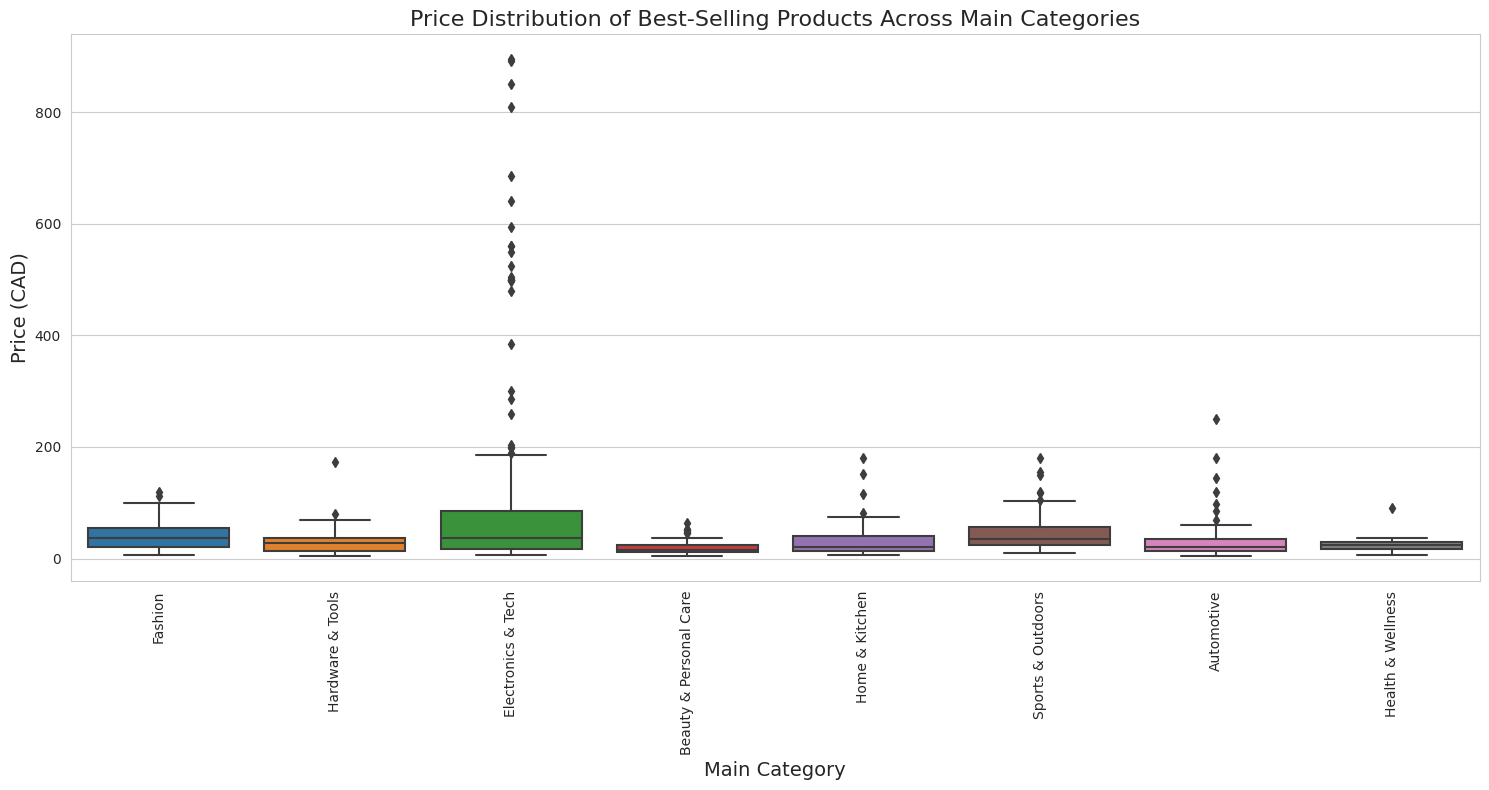

In [23]:
plt.figure(figsize=(15,8))
sns.boxplot(x=best_sellers['mainCategory'], y=best_sellers['price'])
plt.xticks(rotation=90)  
plt.title('Price Distribution of Best-Selling Products Across Main Categories', fontsize=16)
plt.xlabel('Main Category', fontsize=14)
plt.ylabel('Price (CAD)', fontsize=14)
plt.tight_layout()
plt.show()

This box plot shows us the price distribution of best-selling products across various main categories. Here's a brief interpretation:

* "Electronics" and "Health & Wellness" have a wide price range, with some high-priced outliers, indicating a diverse product range from low to high-end.
* "Home & Kitchen" has a higher median price, suggesting that its best-sellers tend to be on the pricier side.
* On the other hand, "Fashion" and "Hardware & Tools" have lower median prices, indicating that their best-sellers are more affordable.
* "Fashion," and "Hardware & Tools" show a tight price distribution, meaning there's less variability in the prices of their best-selling products.

**4.3. Distribution of Star Ratings**

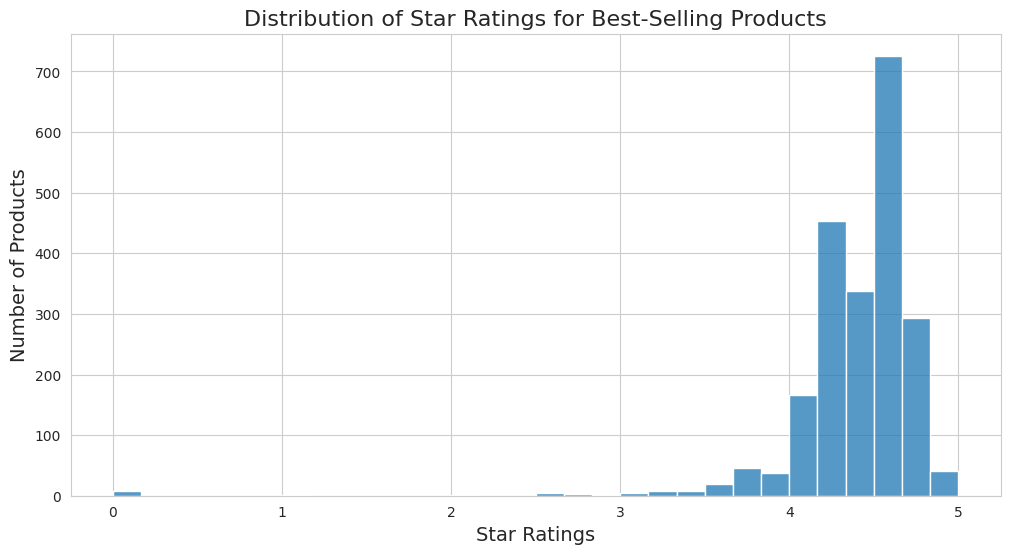

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(best_sellers['stars'], kde=False, bins=30)
plt.title('Distribution of Star Ratings for Best-Selling Products', fontsize=16)
plt.xlabel('Star Ratings', fontsize=14)
plt.ylabel('Number of Products', fontsize=14)
plt.show()


**4.4. Distribution of Review Counts**

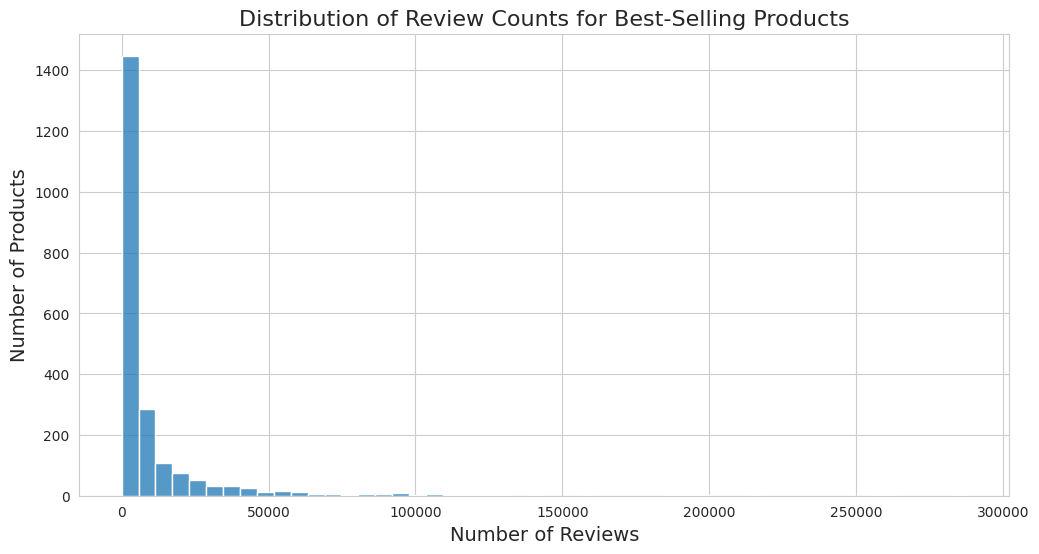

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(best_sellers['reviews'], kde=False, bins=50)
plt.title('Distribution of Review Counts for Best-Selling Products', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=14)
plt.ylabel('Number of Products', fontsize=14)
plt.show()


**4.5. Average Discount Amount by Main Category**

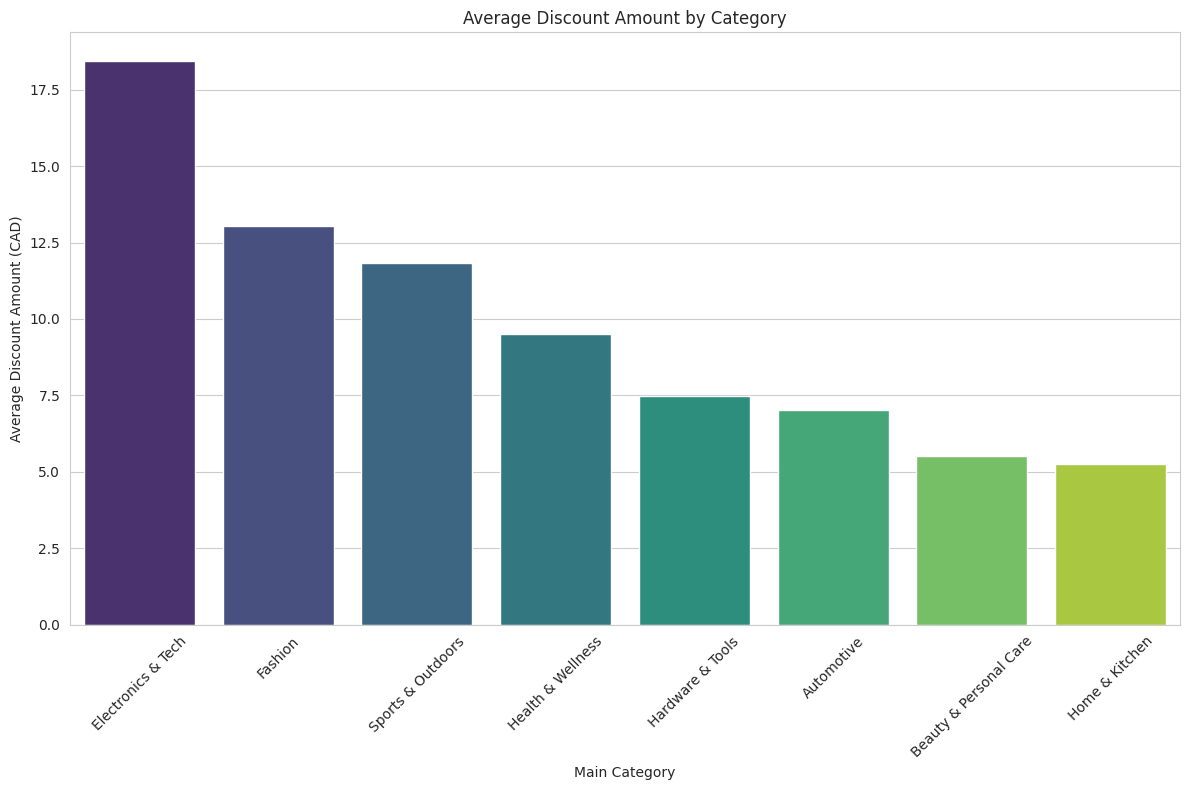

In [26]:
# Computing average discount amount by category
average_discounts = best_sellers.groupby('mainCategory')['discount_amount'].mean().sort_values(ascending=False)

# Visualizing using a bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x=average_discounts.index, y=average_discounts.values, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel('Average Discount Amount (CAD)')
plt.xlabel('Main Category')
plt.title('Average Discount Amount by Category')
plt.tight_layout()
plt.show()


We can derive a few observations:
* Electronics & Tech category offers the highest average discount amount among all the categories. This might be due to the competitive nature of the tech industry or the higher original price points which allows for larger discounts in absolute dollar amounts.
* The second and third highest average discount amounts are in the Fashion and Sports & Outdoors categories respectively.
* Home & Kitchen offers the least discount on average, which might suggest that these products either have a lower markup or are less frequently on promotion compared to other categories.

**4.6. Average Rating by Main Category**

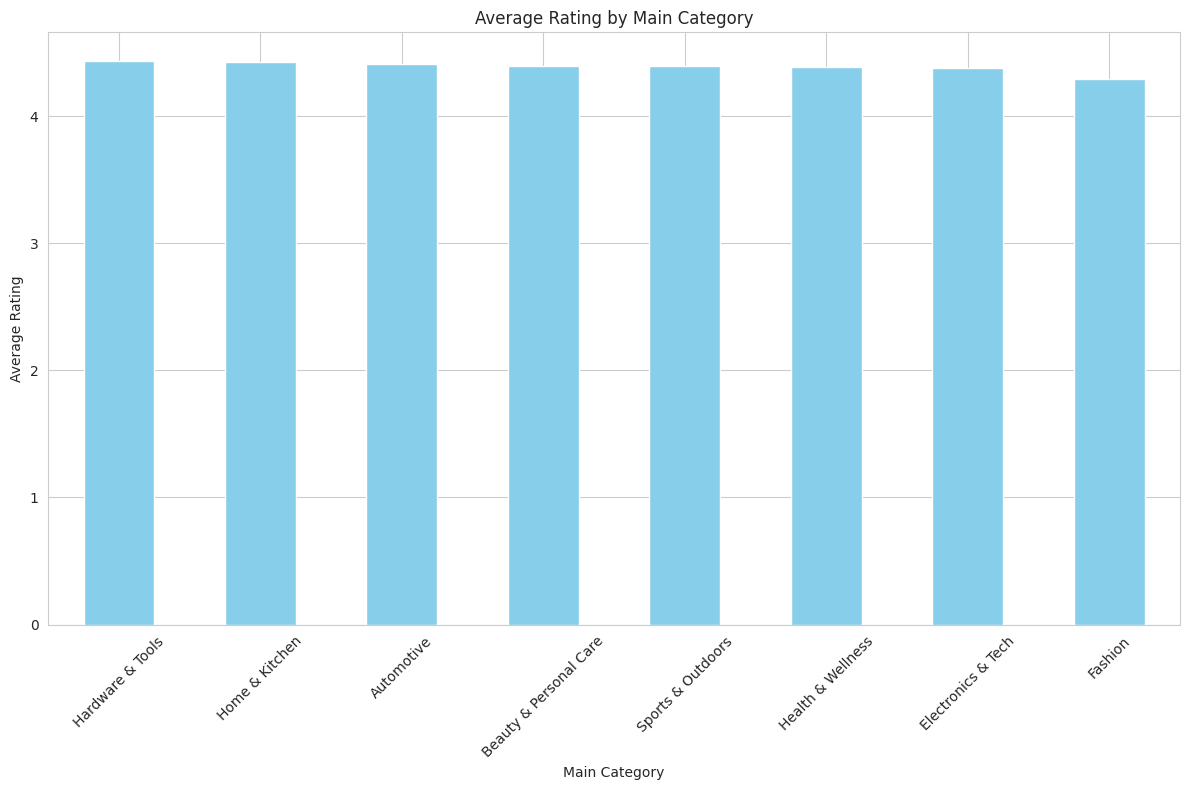

In [27]:
# Grouping by 'mainCategory' and calculating the mean for 'stars' column
avg_ratings = best_sellers.groupby('mainCategory')['stars'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12,8))
avg_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This graph depicts a very consistent average rating across different main categories. Here's a brief interpretation:
1. **Consistent Quality Across Categories:** One possible interpretation is that the products across these main categories have a consistently good quality, leading to similar average ratings. It could suggest that the sellers or brands under these categories maintain a consistent standard of quality.
1. **Customer Expectations:** Another perspective is that customer expectations might be aligned well with what is being delivered in these categories. If there were a significant discrepancy between expectations and actual product quality, we would likely see more variance in the ratings.
1. **Review Bias:** People tend to review products when they have strong feelings, either very positive or very negative. A consistent average could suggest that there isn't a predominant bias in the type of reviews being left (i.e., more people aren't just leaving positive or just negative reviews).
1. **Data Skewness:** If there's a preponderance of products with very few reviews, the average rating might be skewed. It might be worth looking into the distribution of reviews. For example, a product with a single 5-star review will have an average rating of 5, but it might not be as trustworthy as a product with hundreds of reviews averaging 4.5 stars.

**Further Exploration:**  
* **Distribution of Ratings:** Instead of just the average, we should look at the distribution of ratings for each category. This would show if a category has a lot of extreme ratings (either 1s or 5s) versus another that might have more ratings clustered around the mean.
* **Review Count Analysis:** Also we can analyze the number of reviews for products. Categories with products that have many reviews might be more trustworthy in their average rating than those with fewer reviews.

**4.7. Distribution of Ratings** 

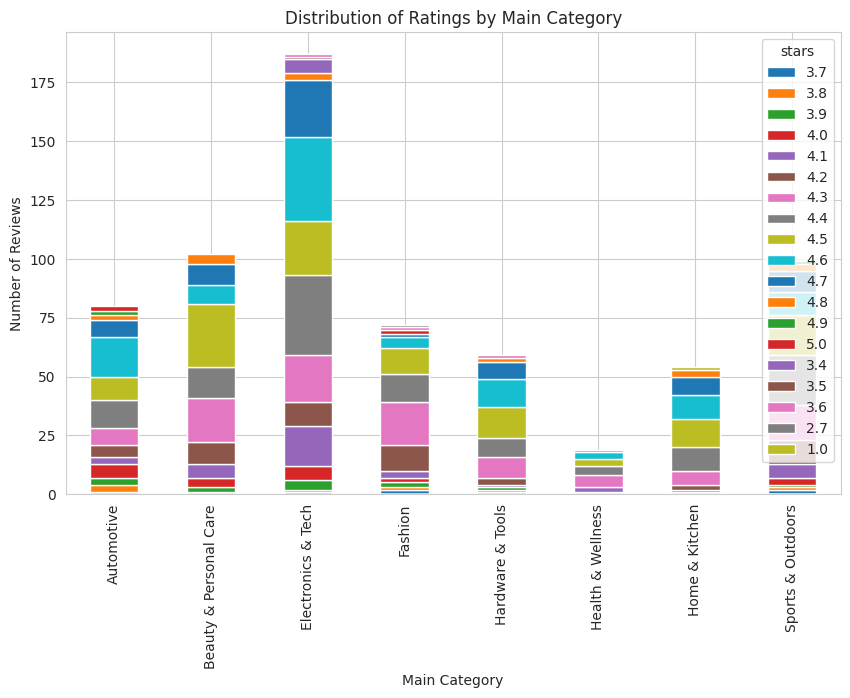

In [28]:
# Grouping by mainCategory and stars and counting the number of occurrences
rating_distribution = best_sellers.groupby(['mainCategory', 'stars']).size().unstack()

# Plotting
rating_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Ratings by Main Category')
plt.ylabel('Number of Reviews')
plt.xlabel('Main Category')
plt.show()

This chart displays the distribution of product ratings across various categories:
1. **Electronics & Tech** has a concentration of products with ratings from 4.6 to 4.8, showing high satisfaction.
1. **Fashion** predominantly falls within the 4.0 to 4.7 range.
1. **Automotive has a broader spread**, with peaks at ratings of 3.6 and 4.6.
1. **Categories like Health & Wellness, Home & Kitchen, and Sports & Outdoors have fewer reviews!**
1. **Outliers are observed in Sports & Outdoors and Automotive**, with some products rated as low as 1.0.

**4.8. Total Number of Reviews**

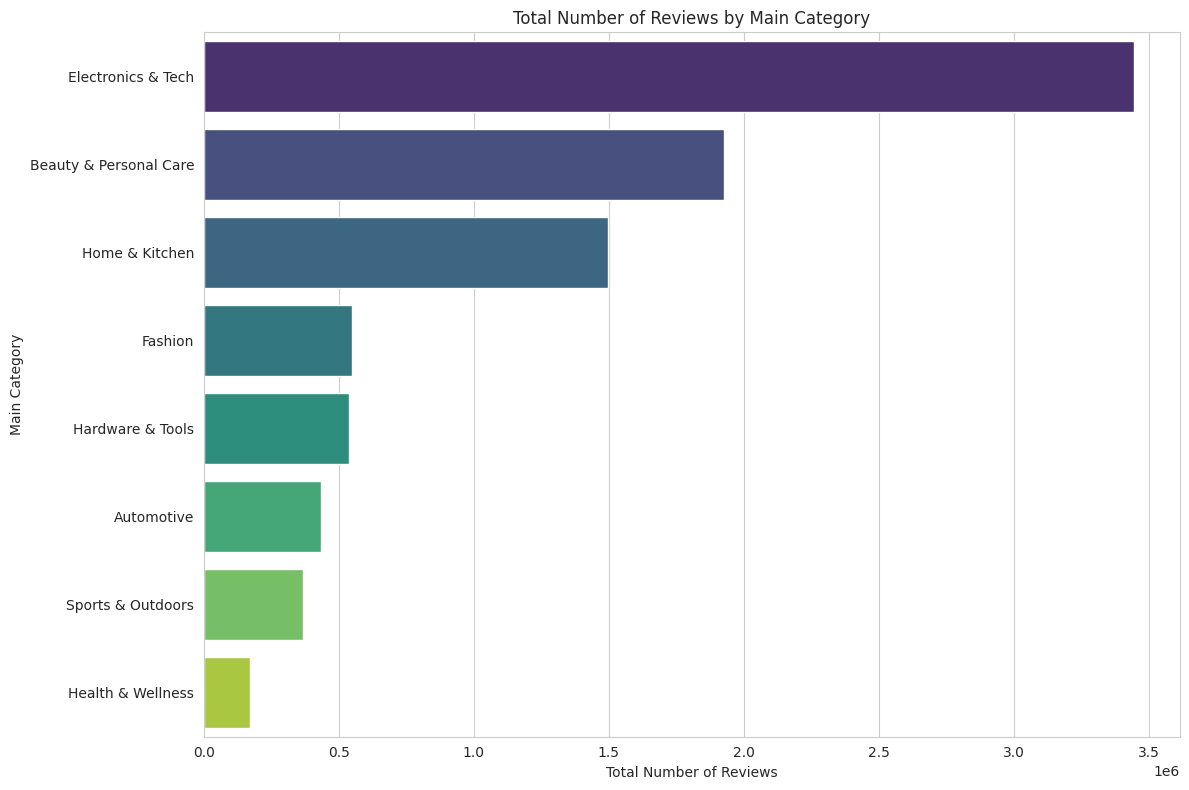

In [29]:
# Grouping by mainCategory and summing the reviews
reviews_by_category = best_sellers.groupby('mainCategory')['reviews'].sum().reset_index()

# Sorting the data for better visualization
reviews_by_category = reviews_by_category.sort_values(by='reviews', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='reviews', y='mainCategory', data=reviews_by_category, palette='viridis')
plt.title('Total Number of Reviews by Main Category')
plt.xlabel('Total Number of Reviews')
plt.ylabel('Main Category')
plt.tight_layout()
plt.show()


Based on this visualization, the "Electronics & Tech", "Beauty & Personal Care", and "Home & Kitchen" categories have a higher number of reviews, suggesting that their star ratings might be more reliable. However, it's important to note that this could be related to the number of products in each category. To get a clearer picture, we should examine the average number of reviews per product in these categories.

**4.9 Average Reviews per Product**

In [30]:
# Group by mainCategory and calculate the total number of reviews and unique product count
grouped = best_sellers.groupby('mainCategory').agg(total_reviews=('reviews', 'sum'), 
                                                  total_products=('asin', 'nunique'))

# Calculate the average number of reviews per product
grouped['avg_reviews_per_product'] = grouped['total_reviews'] / grouped['total_products']

# Sort the categories based on the average number of reviews per product
sorted_categories = grouped.sort_values(by='avg_reviews_per_product', ascending=False)

print(sorted_categories[['avg_reviews_per_product']])

                        avg_reviews_per_product
mainCategory                                   
Home & Kitchen                     27694.444444
Beauty & Personal Care             18896.637255
Electronics & Tech                 18410.647059
Hardware & Tools                    9144.305085
Health & Wellness                   9055.578947
Fashion                             7631.625000
Automotive                          5429.150000
Sports & Outdoors                   3724.444444


**From the bar chart:**
* "Electronics & Tech", "Beauty & Personal Care", and "Home & Kitchen" have the highest total number of reviews. This suggests that products in these categories generally attract a larger audience or have been on the market for a longer period, leading to more reviews.

**From the table:**

* "Home & Kitchen" products receive about 27,694 reviews on average.
* "Beauty & Personal Care" products get an average of 18,897 reviews.
* "Electronics & Tech" items average around 18,411 reviews.

**Combining these insights:**
* "Home & Kitchen" not only has a high total number of reviews but also tops the list with the highest average reviews per product. This implies that not only are there many products in this category that are reviewed, but each individual product also tends to receive a large number of reviews, indicating strong consumer engagement or satisfaction.
* **"Electronics & Tech" has the highest total reviews, but when considering the average reviews per product, it's slightly behind "Beauty & Personal Care". This might suggest that while the Electronics & Tech category has some very popular products attracting a lot of reviews, it might also have a wide variety of products with varying popularity.**
* "Beauty & Personal Care" stands out as a category with both a high total number of reviews and a high average number of reviews per product. This can be indicative of a consistently engaged consumer base that actively reviews products.
* On the other end of the spectrum, categories like "Sports & Outdoors" have lower total reviews and a lower average number of reviews per product. This could be due to fewer products in these categories, the products being niche, or the audience being less inclined to leave reviews.
* Overall, while the total number of reviews provides an understanding of the overall popularity of a category, the average reviews per product offer a more nuanced insight into consumer engagement with individual products in that category.

**5. Summary**

Here's a concise summary of the key findings:

**Price Distribution**
* "Electronics" and "Health & Wellness" feature a wide price range, indicating diverse products from low to high-end.
* "Home & Kitchen" best-sellers lean towards higher prices.
* "Fashion" and "Hardware & Tools" best-sellers are generally more affordable.  

**Discount Amounts**  

* The "Electronics & Tech" category offers the highest average discounts, possibly due to industry competition or higher original prices.
* "Fashion" and "Sports & Outdoors" follow with the second and third highest discounts.
* "Home & Kitchen" products generally have smaller discounts, suggesting lower markups or fewer promotions.  

**Product Ratings**  

* Most main categories maintain consistent average ratings, hinting at stable quality across products or well-met customer expectations.
* There's potential review bias, and it might be beneficial to assess the distribution of reviews for a clearer perspective.  

**Rating Distributions**  

* "Electronics & Tech" shows a trend of high satisfaction among customers.
* "Fashion" has a broad rating range, mostly between 4.0 and 4.7.
* "Automotive" features a wider spread of ratings, with distinct peaks.
* "Health & Wellness", "Home & Kitchen", and "Sports & Outdoors" generally have fewer reviews, which can impact the reliability of their ratings.  

**Review Analysis**  

* "Electronics & Tech", "Beauty & Personal Care", and "Home & Kitchen" dominate in terms of review counts.
* "Home & Kitchen" products have the highest average reviews, suggesting strong consumer engagement.
* "Electronics & Tech" has many reviews but a varied product popularity.
* "Beauty & Personal Care" maintains consistency in both total and average reviews, indicating an active consumer base.  

In summary, while price distribution and discount amounts give insights into marketing and pricing strategies across categories, the review and rating analyses provide a window into consumer satisfaction and engagement. It's vital to consider both the total and average reviews to understand consumer interactions fully.